In [2]:
#!pip3 install fastquant


# Recap from Lesson 1

## Plot Closing Stock Prices


Text(0.5, 1.0, 'Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01')

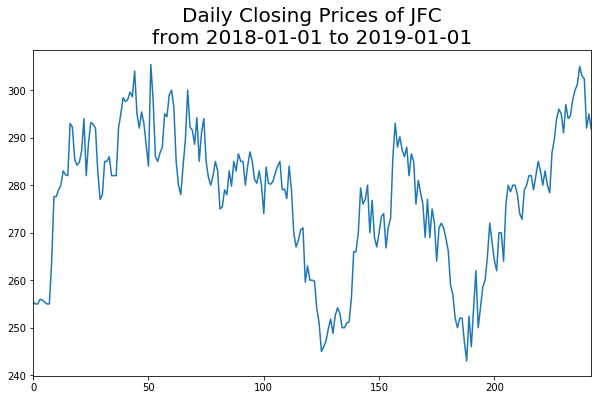

In [5]:
from matplotlib import pyplot as plt
from fastquant import backtest, get_pse_data
#%matplotlib inline
jfc = get_pse_data("JFC", "2018-01-01", "2019-01-01")
jfc.close.plot(figsize=(10, 6))
plt.title("Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

## Analyze with a simple moving average (SMA) trading strategy

Text(0.5, 1.0, 'Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01')

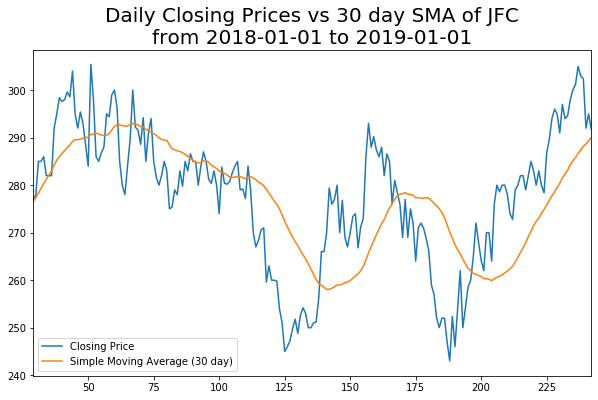

In [6]:
import pandas as pd

ma30 = jfc.close.rolling(30).mean()
close_ma30 = pd.concat([jfc.close, ma30], axis=1).dropna()
close_ma30.columns = ['Closing Price', 'Simple Moving Average (30 day)']

close_ma30.plot(figsize=(10, 6))
plt.title("Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

# Lesson 2: Backtesting with fastquant

## Backtest your trading strategy in 3 lines of code

Now, let's get started with backtesting!

Below, I show how you can use `fastquant` to backtest a simple moving average crossover (similar to what we have above).

The three steps are:
1. Import the `backtest` and `get_pse_data` functions from `fastquant`

In [1]:
from fastquant import backtest, get_pse_data

2. Get stock data in a date, close, volume format (DCV)

Here, we get DCV (date, closing, volume) data from JFC using the `get_pse_data` function

In [2]:
jfc = get_pse_data("JFC", "2018-01-01", "2019-01-01")

Reading cached file found: JFC_2018-01-01_2019-01-01.csv


3. Backtest a simple moving average crossover (`smac`) strategy on the JFC data

We perform the backtest using a 15 day moving average as the "fast" moving average, and a 35 day moving average as the "slow" moving average. If we want to change these parameter values, we can just replace the numbers in the `backtest` function.

We call these the *strategy level arguments* since they are unique to a specific strategy.

Do note that by default, the backtesting algorithm assumes that you start out with PHP 100,000 as cash (`init_cash`), while using all of that cash during a buy signal (`buy_prop`), and selling all of your current stock holdings during a sell signal (`sell_prop`). We call these the *global level arguments* since they can be shared across companies.

Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 35
2018-08-06, BUY CREATE, 280.00
2018-08-06, Cash: 100000.0
2018-08-06, Price: 280.0
2018-08-06, Buy prop size: 354
2018-08-06, Afforded size: 354
2018-08-06, Final size: 354
2018-08-07, BUY EXECUTED, Price: 280.00, Cost: 99120.00, Comm 743.40
2018-09-20, SELL CREATE, 272.00
2018-09-21, SELL EXECUTED, Price: 272.00, Cost: 99120.00, Comm 722.16
2018-09-21, OPERATION PROFIT, GROSS -2832.00, NET -4297.56
2018-10-31, BUY CREATE, 276.00
2018-10-31, Cash: 95702.44
2018-10-31, Price: 276.0
2018-10-31, Buy prop size: 343
2018-10-31, Afforded size: 343
2018-10-31, Final size: 343
2018-11-05, BUY EXECUTED, Price: 276.00, Cost: 94668.00, Comm 710.01
Final Portfolio Value: 100411.83


<IPython.core.display.Javascript object>


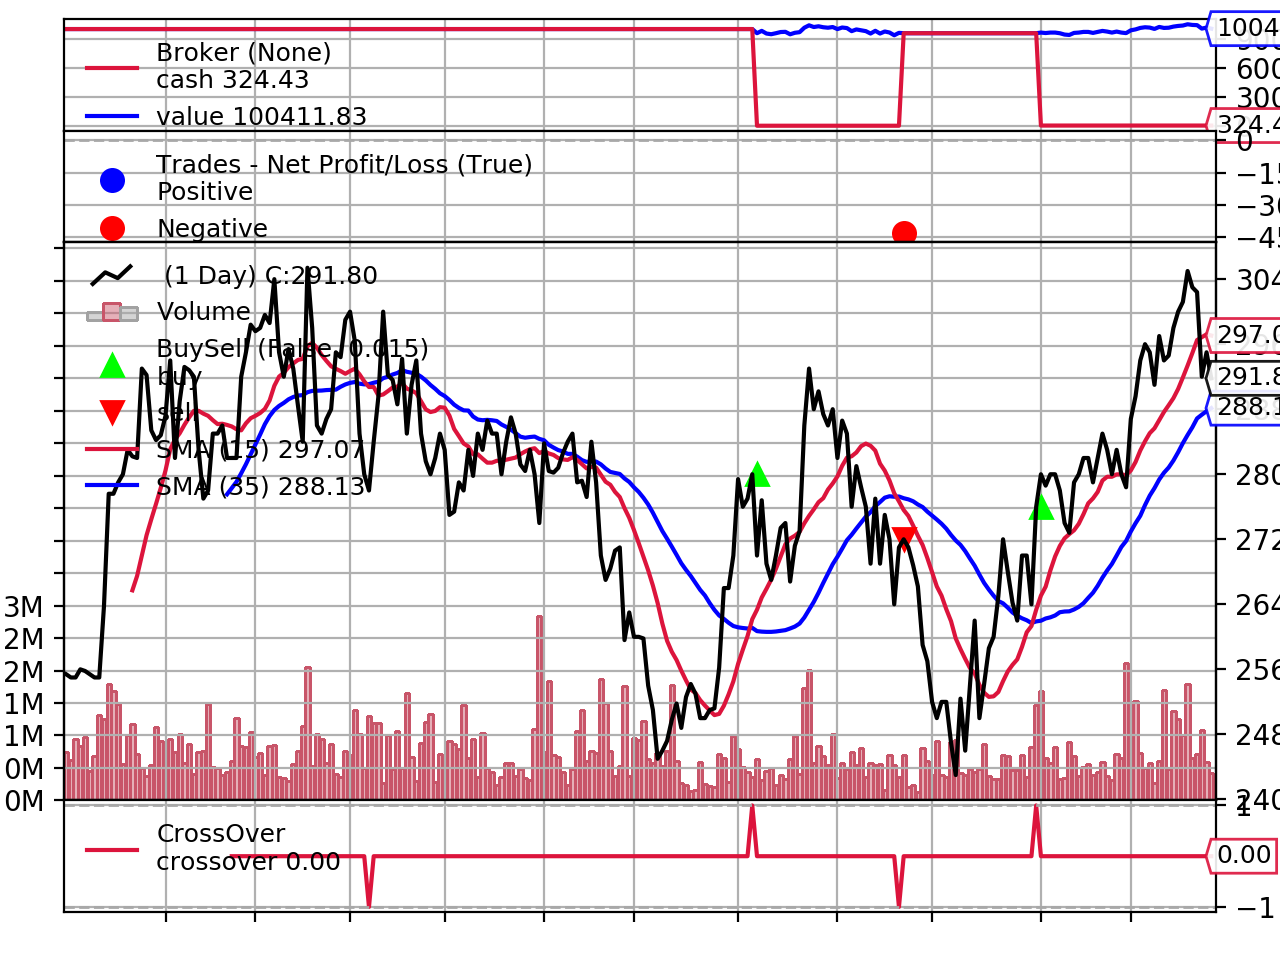

In [3]:
backtest('smac', jfc, fast_period=15, slow_period=35)

## Customize strategy parameters

The idea of backtesting is that we should choose the **best** strategy based on which one has worked best over time.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 1
slow_period : 30
2018-02-26, BUY CREATE, 292.00
2018-02-26, Cash: 100000.0
2018-02-26, Price: 292.0
2018-02-26, Buy prop size: 339
2018-02-26, Afforded size: 339
2018-02-26, Final size: 339
2018-02-27, BUY EXECUTED, Price: 292.00, Cost: 98988.00, Comm 742.41
2018-03-14, SELL CREATE, 284.00
2018-03-15, SELL EXECUTED, Price: 284.00, Cost: 98988.00, Comm 722.07
2018-03-15, OPERATION PROFIT, GROSS -2712.00, NET -4176.48
2018-03-16, BUY CREATE, 305.40
2018-03-16, Cash: 95823.51999999999
2018-03-16, Price: 305.4
2018-03-16, Buy prop size: 311
2018-03-16, Afforded size: 311
2018-03-16, Final size: 311
2018-03-19, BUY EXECUTED, Price: 305.40, Cost: 94979.40, Comm 712.35
2018-03-20, SELL CREATE, 285.00
2018-03-21, SELL EXECUTED, Price: 285.00, Cost: 94979.40, Comm 664.76
2018-03-21, OPERATION PROFIT, GROSS 

<IPython.core.display.Javascript object>


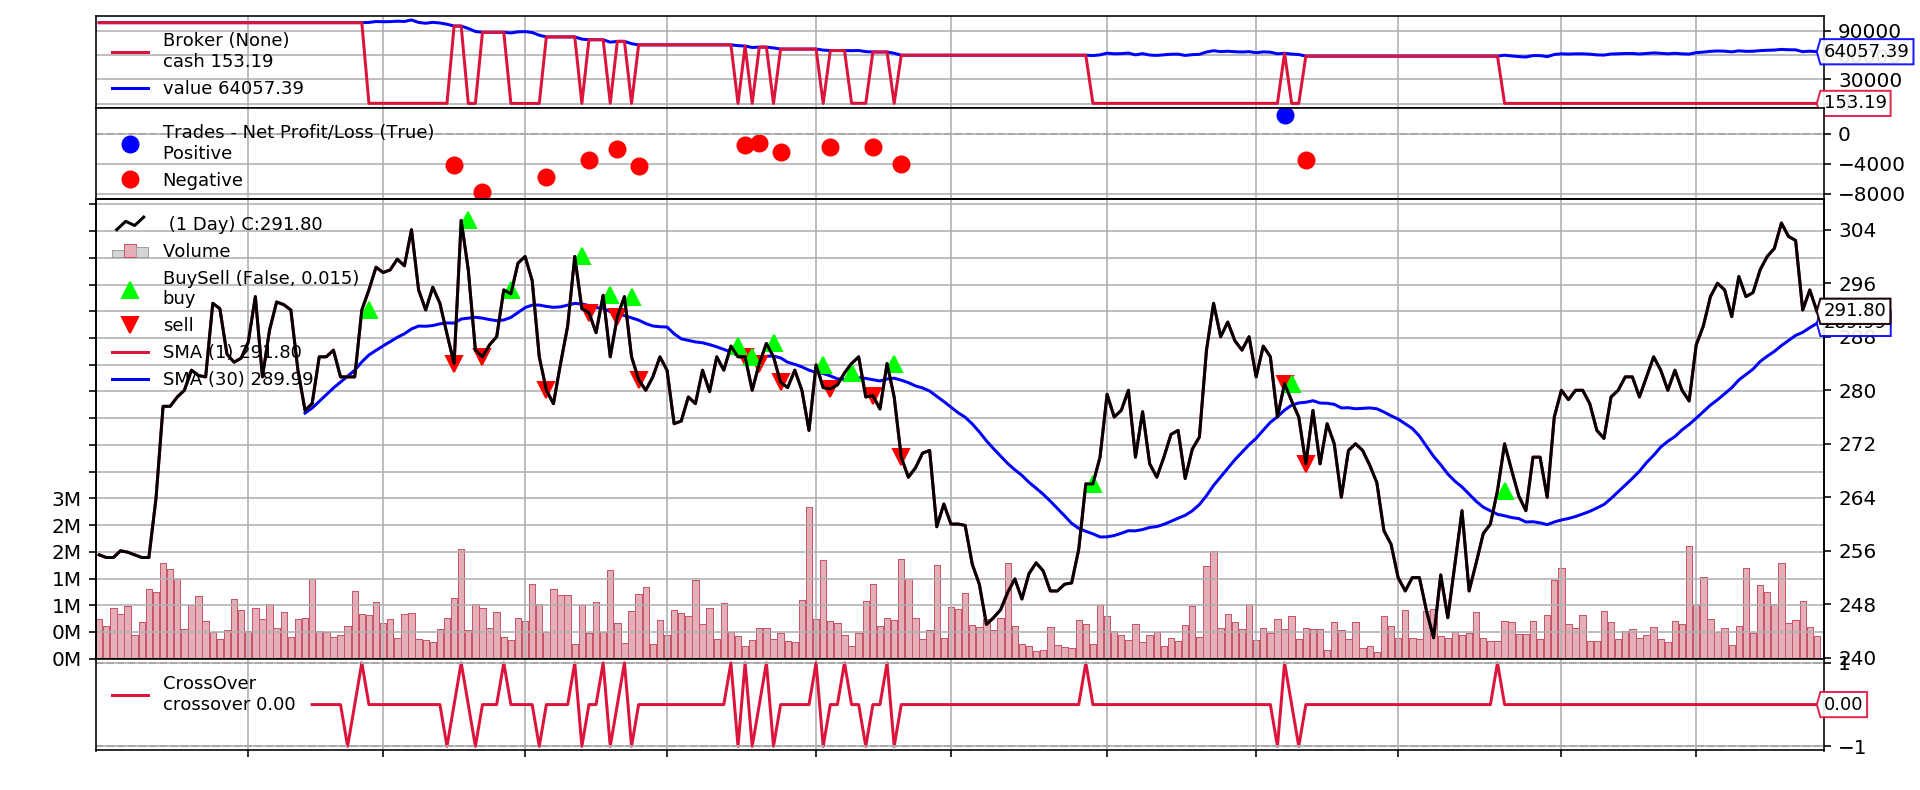

In [8]:
%matplotlib
backtest('smac', jfc, fast_period=1, slow_period=30)

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 30
slow_period : 50
2018-08-23, BUY CREATE, 293.00
2018-08-23, Cash: 100000.0
2018-08-23, Price: 293.0
2018-08-23, Buy prop size: 338
2018-08-23, Afforded size: 338
2018-08-23, Final size: 338
2018-08-24, BUY EXECUTED, Price: 293.00, Cost: 99034.00, Comm 742.75
2018-10-05, SELL CREATE, 243.00
2018-10-08, SELL EXECUTED, Price: 243.00, Cost: 99034.00, Comm 616.00
2018-10-08, OPERATION PROFIT, GROSS -16900.00, NET -18258.76
2018-11-19, BUY CREATE, 282.00
2018-11-19, Cash: 81741.23999999999
2018-11-19, Price: 282.0
2018-11-19, Buy prop size: 287
2018-11-19, Afforded size: 287
2018-11-19, Final size: 287
2018-11-20, BUY EXECUTED, Price: 282.00, Cost: 80934.00, Comm 607.00
Final Portfolio Value: 83946.83


<IPython.core.display.Javascript object>


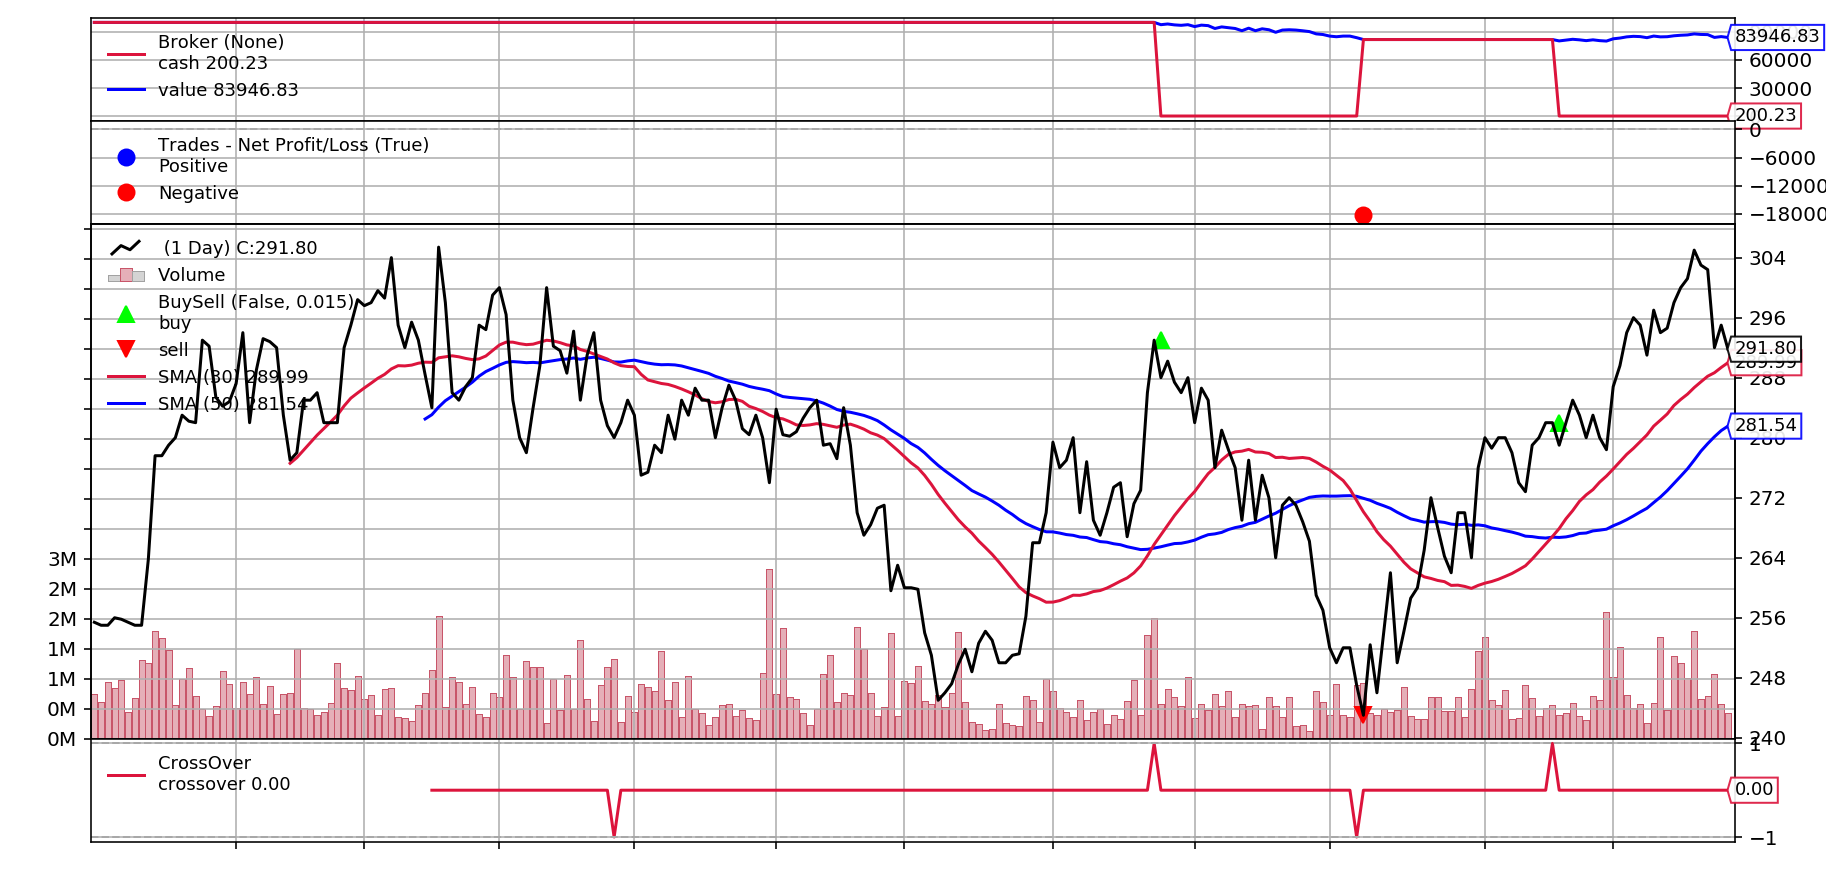

In [10]:
%matplotlib
backtest('smac', jfc, fast_period=30, slow_period=50)

 We can conclude that across all the parameter combinations we've tried, the best performing one is the one where `fast_period` = 15, while `slow_period` = 40.

Using matplotlib backend: MacOSX
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 15
slow_period : 40
2018-08-07, BUY CREATE, 270.00
2018-08-07, Cash: 100000.0
2018-08-07, Price: 270.0
2018-08-07, Buy prop size: 367
2018-08-07, Afforded size: 367
2018-08-07, Final size: 367
2018-08-08, BUY EXECUTED, Price: 270.00, Cost: 99090.00, Comm 743.17
2018-09-21, SELL CREATE, 271.00
2018-09-24, SELL EXECUTED, Price: 271.00, Cost: 99090.00, Comm 745.93
2018-09-24, OPERATION PROFIT, GROSS 367.00, NET -1122.10
2018-11-05, BUY CREATE, 280.00
2018-11-05, Cash: 98877.89749999999
2018-11-05, Price: 280.0
2018-11-05, Buy prop size: 350
2018-11-05, Afforded size: 350
2018-11-05, Final size: 350
2018-11-06, BUY EXECUTED, Price: 280.00, Cost: 98000.00, Comm 735.00
Final Portfolio Value: 102272.90


<IPython.core.display.Javascript object>


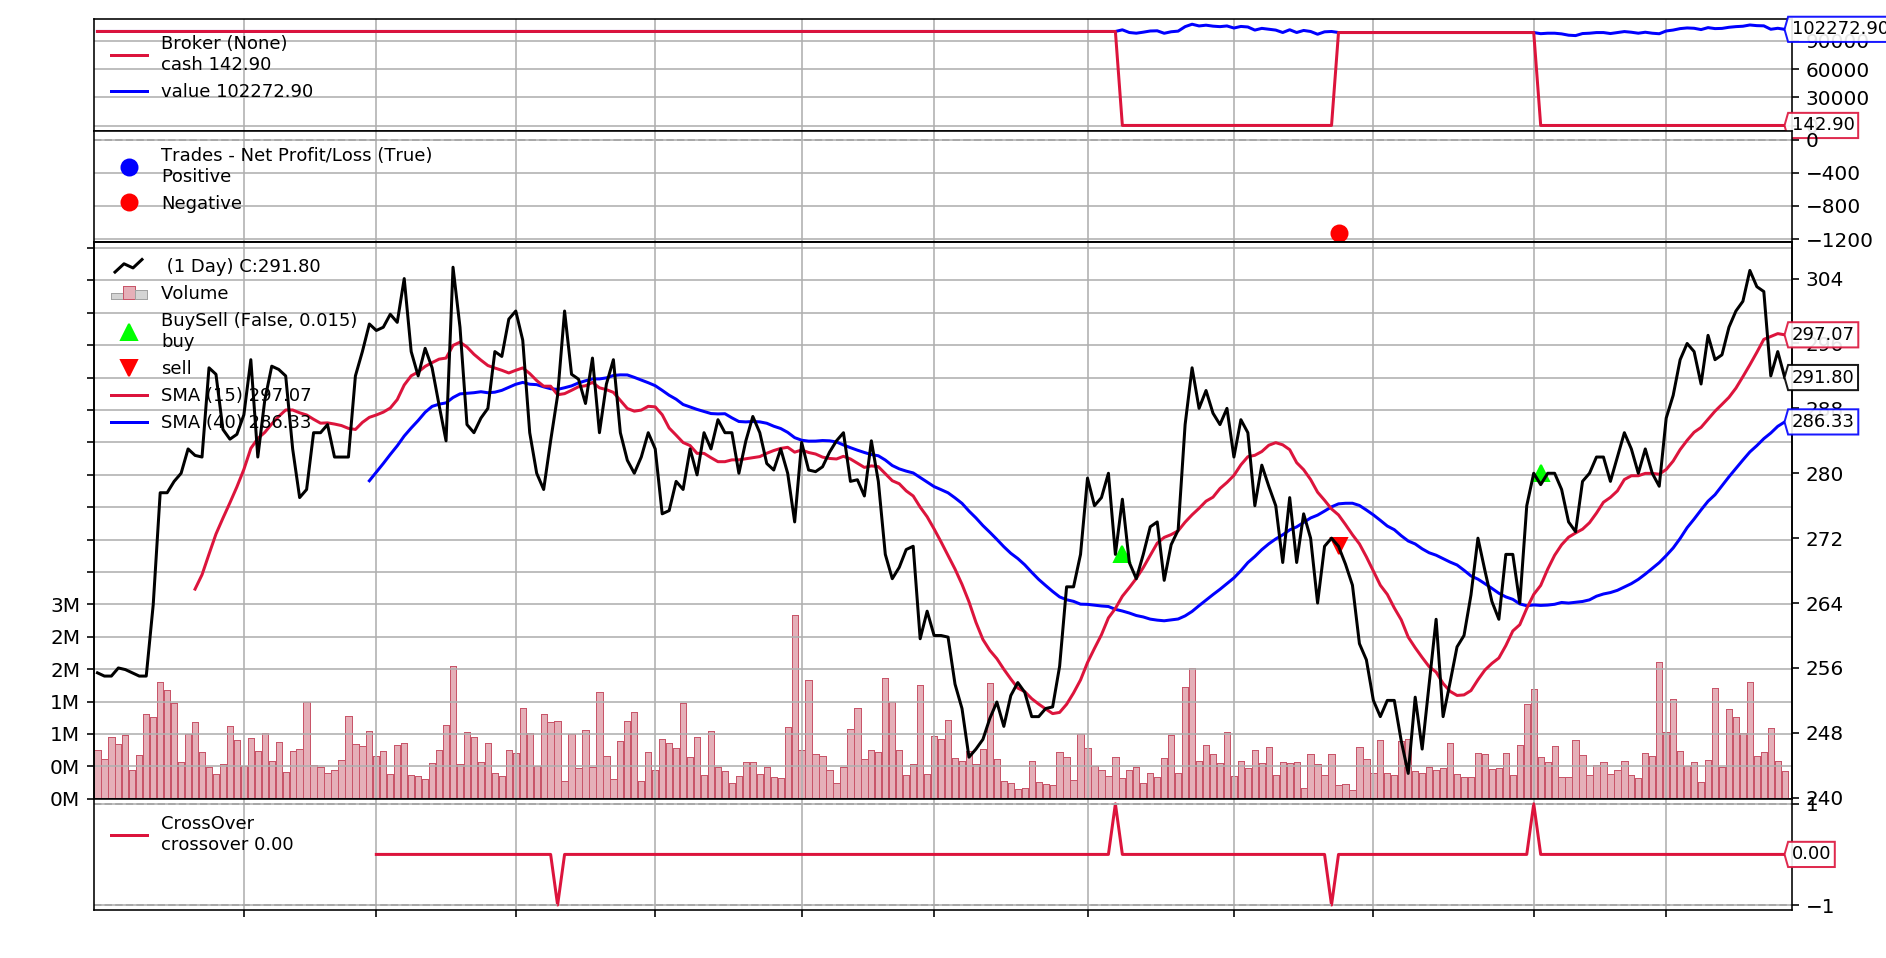

In [9]:
%matplotlib
backtest('smac', jfc, fast_period=15, slow_period=40)